<a href="https://colab.research.google.com/github/scartt/CS505_PA/blob/main/PA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
# CS505 PA1
# Sijia Li
# scartt@bu.edu

In [143]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [144]:
#Step 1: installing tweepy, the tool to scrap data from Twitter (before that, please make sure you have your Bearer ready)
!pip3 install tweepy
!pip3 install tweepy --upgrade # make sure your tweepy is up-to-date (>=4.10.1), otherwise there's a chance your won't be able to interact with Twitter API v2.
#Restart Runtime might be needed.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [145]:
#Step 2: initiate your client
# You will need to get your bearer token from the email sent to you.
import tweepy
client = tweepy.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAAF5XhQEAAAAAvA5I9cICfHVWO75mcl1xwXPKkII%3DtpGIaqOiMZTYnuj8UwsllAxOw7ZhU7AVxraUPSjIVU81PuKxQL') # replace with your bearer token here.

In [146]:
query = 'football -is:retweet'
tweets = list(tweepy.Paginator(client.search_recent_tweets, query=query, tweet_fields=['context_annotations', 'created_at'], max_results=100).flatten(limit=1000))
print("{} tweets are collected.".format(len(tweets)))

1000 tweets are collected.


In [147]:
import csv
import re

driveFolderDirectory = '/content/drive/MyDrive/Colab Notebooks' 
savedFileName = 'tweets.csv'
pathToSave = driveFolderDirectory + savedFileName

with open(pathToSave, 'w', newline='') as csvfile:
  fieldnames = ['idx','tweetId', 'tweetText']
  writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
  writer.writeheader()
  for i,tweet in enumerate(tweets):
    writer.writerow({'idx': i, 'tweetId': tweet.id,'tweetText': tweet.data['text']})

In [148]:
# TASK 1: Convert all capital letters into lower case
f = open("/content/drive/MyDrive/tweets.csv", "r")
print(f.readline())
print(f.readline())
print(f.readline())

idx,tweetId,tweetText

0,1572758273194852353,@Football__Tweet @ManUtd Such a wild volley

1,1572758269063462913,مفاجأة مدوية.. محمد صلاح قد يغادر معسكر منتخب مصر https://t.co/0iuvPvsqFy



In [149]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/tweets.csv",index_col=0)
df.head(10)

,tweetId,tweetText
idx,,
0,1572758273194852353,@Football__Tweet @ManUtd Such a wild volley
1,1572758269063462913,مفاجأة مدوية.. محمد صلاح قد يغادر معسكر منتخب ...
2,1572758267633221635,@Palpyte1 @nflrums Maybe you’re better off wat...
3,1572758266555285504,@jimmybuxbux @NFLonFOX He deleted it during th...
4,1572758265867403268,قائد الزمالك السابق يقترب من الداخلية https://...
5,1572758262378024961,كولر يحفز لاعبي الأهلي بمكافأة كبيرة قبل بداية...
6,1572758257286152192,@smiznith @BVSZN23 @ColinCowherd @OU_Football ...
7,1572758251867078657,@PRINCE_ANGELUS_ @KeishaBoston @EmmanuelAcho @...
8,1572758244124401664,@ClowESPN @GatorsFB @Vol_Football 1990. Sold ...


In [150]:
import string
# helper function to convert upper to lowercase
def convert_to_lower(text):
    if text.group() is not None:
        return text.group().lower()

# Loop through the dataframe
i = 0
while i < len(df):
  str = df['tweetText'][i]
  # pass replacement function to re.sub()
  df['tweetText'][i] = re.sub(r"[A-Z]", convert_to_lower, str)
  i += 1
print(df['tweetText'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


idx
0            @football__tweet @manutd such a wild volley
1      مفاجأة مدوية.. محمد صلاح قد يغادر معسكر منتخب ...
2      @palpyte1 @nflrums maybe you’re better off wat...
3      @jimmybuxbux @nflonfox he deleted it during th...
4      قائد الزمالك السابق يقترب من الداخلية https://...
                             ...                        
995    @patmcafeeshow @dariusjbutler @dariusjbutler b...
996    kittitas/thorp vs river view hs football 2022 ...
997                               @sk10_football ماردونا
998    atascocita qb zion brown (@zionqb) \ngrowing i...
999    to the swans &amp; cats. at the first bounce p...
Name: tweetText, Length: 1000, dtype: object


In [151]:
# TASK 2: Remove from the text all hashtags, all URLs, and all numbers (e.g., prices, floating-point, integers, etc.).
# Loop through the dataframe
i = 0
while i < len(df):
  str = df['tweetText'][i]
  # pass replacement function to re.sub()
  df['tweetText'][i] = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",str).split())
  i += 1
print(df['tweetText'])

idx
0                               tweet such a wild volley
1                                                       
2      maybe you re better off watching flag football...
3      he deleted it during the summer to focus on fo...
4                                                       
                             ...                        
995    best defensive football teacher on the planet ...
996    kittitas thorp vs river view hs football 2022 ...
997                                             football
998    atascocita qb zion brown growing into leadersh...
999    to the swans amp cats at the first bounce plea...
Name: tweetText, Length: 1000, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [152]:
# TASK 3: Remove the affixes -ing, -ed, and -ly from all words. 
i = 0
while i < len(df):
  str = df['tweetText'][i]
  # pass replacement function to re.sub()
  df['tweetText'][i] = ' '.join(re.sub("ing|ed|ly"," ",str).split())
  i += 1
print(df['tweetText'])

idx
0                               tweet such a wild volley
1                                                       
2      maybe you re better off watch flag football i ...
3      he delet it dur the summer to focus on footbal...
4                                                       
                             ...                        
995    best defensive football teacher on the planet ...
996    kittitas thorp vs river view hs football 2022 ...
997                                             football
998    atascocita qb zion brown grow into leadership ...
999    to the swans amp cats at the first bounce plea...
Name: tweetText, Length: 1000, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [153]:
# TASK 4: Replace all forms of the verb “to be” with the stem be. 
i = 0
while i < len(df):
  str = df['tweetText'][i]
  # pass replacement function to re.sub()
  df['tweetText'][i] = ' '.join(re.sub("be|am|is|are|was|were|being|been","be",str).split())
  i += 1
print(df['tweetText'])

idx
0                               tweet such a wild volley
1                                                       
2      maybe you re better off watch flag football i ...
3      he delet it dur the summer to focus on footbal...
4                                                       
                             ...                        
995    best defensive football teacher on the planet ...
996    kittitas thorp vs river view hs football 2022 ...
997                                             football
998    atascocita qb zion brown grow into leadership ...
999    to the swans bep cats at the first bounce plea...
Name: tweetText, Length: 1000, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [160]:
# TASK 5: Remove all instances of the 10 most common words in English.
i = 0
while i < len(df):
  str = df['tweetText'][i]
  # pass replacement function to re.sub()
  # df['tweetText'][i] = re.sub(r'(?<![a-z])[and|that|but|so|if|about|get|when|can|the](?![a-z])', ' ', str, flags=re.IGNORECASE)
  df['tweetText'][i] = re.sub(' and | that | but | on | if | about | get | when | can | the ', ' ', str, flags=re.IGNORECASE)
  i += 1
print(df['tweetText'][:20])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


idx
0                              tweet such a wild volley
1                                                      
2     maybe you re better off watch flag football i ...
3     he delet it dur summer to focus football s wha...
4                                                      
5                                                      
6                       football yea sum strange go huh
7     angelus you re at gbee you see whole field you...
8                   football 1990 sold cokes in stadium
9                 tak it to football tebe in wsh sunday
10                                        football bale
11                                     football go vols
12    never he had a little football hang in mirror ...
13    bro said dbemantle like i didn t watch footbal...
14                                    football my kaleb
15    i said for better or for worse because maybe t...
16    mercato pochettino et leonardo en clash depube...
17    very proud of my boy not sure how he d

In [180]:
# TASK 6: Remove numbers.
i = 0
while i < len(df):
  str = df['tweetText'][i]
  # pass replacement function to re.sub()
  df['tweetText'][i] = re.sub(" \d+", "", str)
  if df['tweetText'][i] == '':
    df.drop(i)
  i += 1
print(df['tweetText'][:20])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


idx
0                              tweet such a wild volley
1                                                      
2     maybe you re better off watch flag football i ...
3     he delet it dur summer to focus football s wha...
4                                                      
5                                                      
6                       football yea sum strange go huh
7     angelus you re at gbee you see whole field you...
8                        football sold cokes in stadium
9                 tak it to football tebe in wsh sunday
10                                        football bale
11                                     football go vols
12    never he had a little football hang in mirror ...
13    bro said dbemantle like i didn t watch footbal...
14                                    football my kaleb
15    i said for better or for worse because maybe t...
16    mercato pochettino et leonardo en clash depube...
17    very proud of my boy not sure how he d

In [175]:
# TASK 7: Tokenization
df['tweetText_new'] = df['tweetText_new']
i = 0
while i < len(df):
  str = df['tweetText'][i]
  df['tweetText_new'][i]=re.split("\W+",str) 
  i += 1
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,tweetId,tweetText,tweetText_new,len
idx,,,,
0,1572758273194852353,tweet such a wild volley,"[tweet, such, a, wild, volley]",5
1,1572758269063462913,,[],1
2,1572758267633221635,maybe you re better off watch flag football i ...,"[maybe, you, re, better, off, watch, flag, foo...",18
3,1572758266555285504,he delet it dur summer to focus football s wha...,"[he, delet, it, dur, summer, to, focus, footba...",20
4,1572758265867403268,,[],1


In [186]:
# TASK 8: Length of sentences and visualization.
df['len'] = df['tweetText_new']
i = 0
while i < len(df):
  df['len'][i] = len(df['tweetText_new'][i])
  if df['tweetText_new'][i] == ['']:
    df['len'][i] = 0
  i += 1
df.head(20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,tweetId,tweetText,tweetText_new,len
idx,,,,
0,1572758273194852353,tweet such a wild volley,"[tweet, such, a, wild, volley]",5
1,1572758269063462913,,[],0
2,1572758267633221635,maybe you re better off watch flag football i ...,"[maybe, you, re, better, off, watch, flag, foo...",18
3,1572758266555285504,he delet it dur summer to focus football s wha...,"[he, delet, it, dur, summer, to, focus, footba...",20
4,1572758265867403268,,[],0
5,1572758262378024961,,[],0
6,1572758257286152192,football yea sum strange go huh,"[football, yea, sum, strange, go, huh]",6
7,1572758251867078657,angelus you re at gbee you see whole field you...,"[angelus, you, re, at, gbee, you, see, whole, ...",26
8,1572758244124401664,football sold cokes in stadium,"[football, sold, cokes, in, stadium]",5


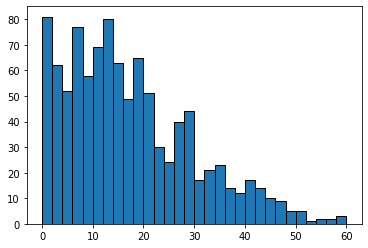

<Figure size 720x720 with 0 Axes>

In [197]:
import matplotlib.pyplot as plt
import numpy as np

x = df['len']
w = 2
plt.hist(x, edgecolor='black', bins=np.arange(min(x), max(x) + w, w))
plt.figure(figsize=(10,10))
plt.show()